# Machine Learning - Clase 1

Fecha: **18/01/2024**

Autor: **Ing. Juan Carlos Chambi**

Objetivo:

Aplicar los modelos de Machine Learning de Aprendizaje Supervisado e interpretar los resultados de cada uno de los modelos.

Fuentes:

1. [Regresión lineal.](https://www.kaggle.com/code/sa7vik/linear-regression-practice-model)
2. [Regresión lineal múltiple.](https://www.kaggle.com/code/huseyinbaytar/medical-cost-prediction)
3. [Práctica](https://www.kaggle.com/code/sadiqshah/bike-store-sales-in-europe/notebook)

# Importar paquetes de Python

In [151]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from xgboost import plot_importance

# Preparar dataset

In [152]:
!curl --output clase_1_explicacion_train.csv https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/clase_1_explicacion_train.csv
!curl --output clase_1_explicacion_test.csv https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/clase_1_explicacion_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10384  100 10384    0     0  20031      0 --:--:-- --:--:-- --:--:-- 20046
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4461  100  4461    0     0  12482      0 --:--:-- --:--:-- --:--:-- 12460


In [153]:
# train_df = pd.read_csv('/content/clase_1_explicacion_train.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/clase_1_explicacion_train.csv')
test_df = pd.read_csv('/content/clase_1_explicacion_test.csv')

In [154]:
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [155]:
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [157]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


A partir de la información mostrada para cada dataframe, se evidencia que el dataset de entrenamiento tiene un valor vacío en la variable de respuesta.

Debido a que la cantidad de registros no es muy significativa, se procede a eliminar el registro del dataset de entrenamiento.

Eliminar los valores vacíos `NaN`.

In [158]:
train_df.dropna(inplace=True)

In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Corroboro que se haya eliminado el registro vacío.

Se evidencia que ahora ya no hay 700 registros en el dataset de entrenamiento, sino hay 699 registros.

In [160]:
train_df.shape

(699, 2)

In [161]:
test_df.shape

(300, 2)

# Regresión lineal simple

Separar los dataframe en variables predictoras


\begin{equation}
y = b_0 + b_1 \cdot x_1 + \varepsilon
\end{equation}

Donde:

\begin{align*}
y & : \text{Variable dependiente} \\
x_1 & : \text{Variable independiente} \\
b_0 & : \text{Ordenada al origen (intercepto)} \\
b_1 & : \text{Pendiente de la línea de regresión} \\
\varepsilon & : \text{Término de error}
\end{align*}





In [162]:
x_train = train_df['x']
y_train = train_df['y']

x_test = test_df['x']
y_test = test_df['y']

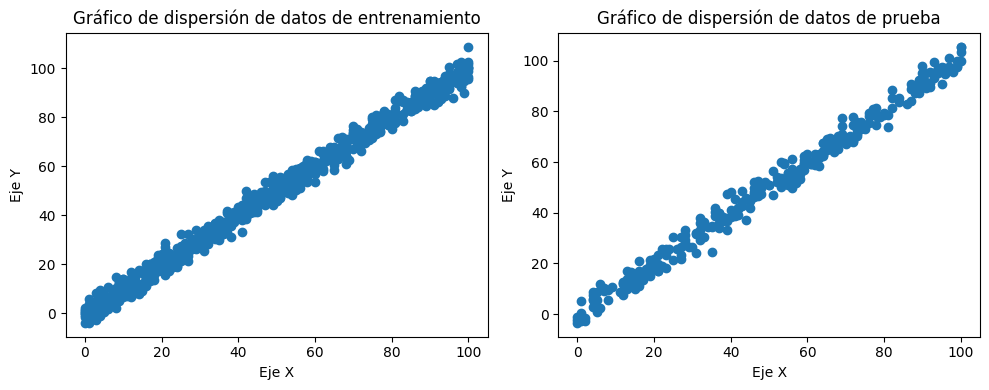

In [163]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

# Graficar datos de entrenamiento
axes[0].plot(x_train, y_train, 'o')
axes[0].set_title('Gráfico de dispersión de datos de entrenamiento')
axes[0].set_xlabel('Eje X')
axes[0].set_ylabel('Eje Y')

# Graficar datos de prueba
axes[1].plot(x_test, y_test, 'o')
axes[1].set_title('Gráfico de dispersión de datos de prueba')
axes[1].set_xlabel('Eje X')
axes[1].set_ylabel('Eje Y')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

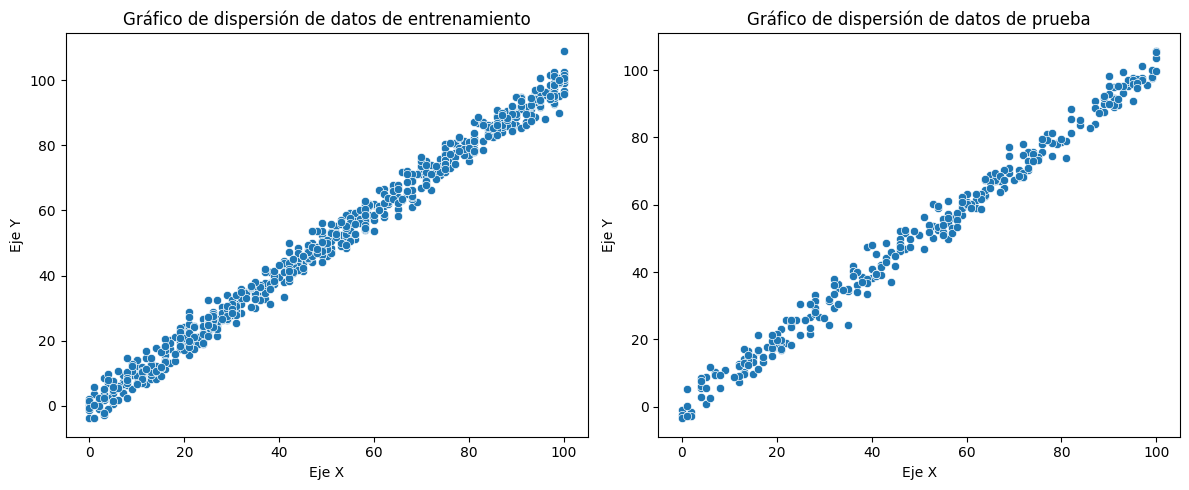

In [164]:
# Crear subgráficos
plt.figure(figsize=(12, 5))

# Subgráfico 1
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_train, y=y_train)
plt.title('Gráfico de dispersión de datos de entrenamiento')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Subgráfico 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=x_test, y=y_test)
plt.title('Gráfico de dispersión de datos de prueba')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

In [165]:
# Crear subgráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=['Gráfico de dispersión de datos de entrenamiento',
                                                    'Gráfico de dispersión de datos de prueba'])

# Subgráfico 1
trace_train = go.Scatter(x=x_train, y=y_train, mode='markers')
fig.add_trace(trace_train, row=1, col=1)
fig.update_xaxes(title_text='Eje X', row=1, col=1)
fig.update_yaxes(title_text='Eje Y', row=1, col=1)

# Subgráfico 2
trace_test = go.Scatter(x=x_test, y=y_test, mode='markers')
fig.add_trace(trace_test, row=1, col=2)
fig.update_xaxes(title_text='Eje X', row=1, col=2)
fig.update_yaxes(title_text='Eje Y', row=1, col=2)

# Actualizar diseño
fig.update_layout(title='Scatter Plots',
                  showlegend=False)

# Mostrar el gráfico
fig.show()

Preparar los datos para el modelo de regresión lineal.

Los datos se encuentran en un dataframe. Por lo que, se debe pasar a un arreglo.

En este caso, se procede a pasar los datos a tipo arreglo multidimensional `numpy.ndarray`.

In [166]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

print(type(x_train), type(x_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Como podemos ver esto redimensiona nuestro array a 1 fila y una columna

In [167]:
print(x_train)

[[ 24.]
 [ 50.]
 [ 15.]
 [ 38.]
 [ 87.]
 [ 36.]
 [ 12.]
 [ 81.]
 [ 25.]
 [  5.]
 [ 16.]
 [ 16.]
 [ 24.]
 [ 39.]
 [ 54.]
 [ 60.]
 [ 26.]
 [ 73.]
 [ 29.]
 [ 31.]
 [ 68.]
 [ 87.]
 [ 58.]
 [ 54.]
 [ 84.]
 [ 58.]
 [ 49.]
 [ 20.]
 [ 90.]
 [ 48.]
 [  4.]
 [ 25.]
 [ 42.]
 [  0.]
 [ 60.]
 [ 93.]
 [ 39.]
 [  7.]
 [ 21.]
 [ 68.]
 [ 84.]
 [  0.]
 [ 58.]
 [ 19.]
 [ 36.]
 [ 19.]
 [ 59.]
 [ 51.]
 [ 19.]
 [ 33.]
 [ 85.]
 [ 44.]
 [  5.]
 [ 59.]
 [ 14.]
 [  9.]
 [ 75.]
 [ 69.]
 [ 10.]
 [ 17.]
 [ 58.]
 [ 74.]
 [ 21.]
 [ 51.]
 [ 19.]
 [ 50.]
 [ 24.]
 [  0.]
 [ 12.]
 [ 75.]
 [ 21.]
 [ 64.]
 [  5.]
 [ 58.]
 [ 32.]
 [ 41.]
 [  7.]
 [  4.]
 [  5.]
 [ 49.]
 [ 90.]
 [  3.]
 [ 11.]
 [ 32.]
 [ 83.]
 [ 25.]
 [ 83.]
 [ 26.]
 [ 76.]
 [ 95.]
 [ 53.]
 [ 77.]
 [ 42.]
 [ 25.]
 [ 54.]
 [ 55.]
 [  0.]
 [ 73.]
 [ 35.]
 [ 86.]
 [ 90.]
 [ 13.]
 [ 46.]
 [ 46.]
 [ 32.]
 [  8.]
 [ 71.]
 [ 28.]
 [ 24.]
 [ 56.]
 [ 49.]
 [ 79.]
 [ 90.]
 [ 89.]
 [ 41.]
 [ 27.]
 [ 58.]
 [ 26.]
 [ 31.]
 [ 70.]
 [ 71.]
 [ 39.]
 [  7.]
 [ 48.]
 [ 56.]


In [168]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_error, r2_score

Elección del modelo de Machine Learning

In [169]:
reg = LinearRegression()

Ajustar el modelo de Machine Learning

In [170]:
reg.fit(x_train, y_train)

LinearRegression()

Obtener las variables predecidas del modelo

In [171]:
pred = reg.predict(x_test)

Valor de la pendiente de la recta.

Existe un valor por cada una de las variables de entrada.

In [172]:
reg.coef_

array([1.00065638])

Valor donde intercepta al eje Y.

In [173]:
reg.intercept_

-0.10726546430097272

Accuracy del modelo:

\begin{align*}
R^2
\end{align*}
Coeficiente de determinación

In [174]:
r2_train = reg.score(x_train, y_train)
r2_train

0.9907015319025518

In [175]:
r2_test = reg.score(x_test, y_test)
r2_test

0.9888014444327563

Error cuadrático medio

In [176]:
y_train_pred = reg.predict(x_train)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
rmse_train

2.8049514672250013

In [177]:
rmse_test = np.sqrt(MSE(y_test, pred))
rmse_test

3.071306268029827

Error absoluto medio

In [178]:
mae_train = MAE(y_train, y_train_pred)
mae_train

2.2271519536455573

In [179]:
mae_test = MAE(y_test, pred)
mae_test

2.415771850041258

Almaceno los resultados del modelo para comparar más adelante.

In [180]:
resultados = []
resultado = {
    'Modelo': 'regresión lineal simple',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados.append(resultado)

resultados_df = pd.DataFrame(resultados)

In [181]:
resultados_df.head()

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal simple,0.990702,0.988801,2.804951,3.071306,2.227152,2.415772


Gráfico de la recta:

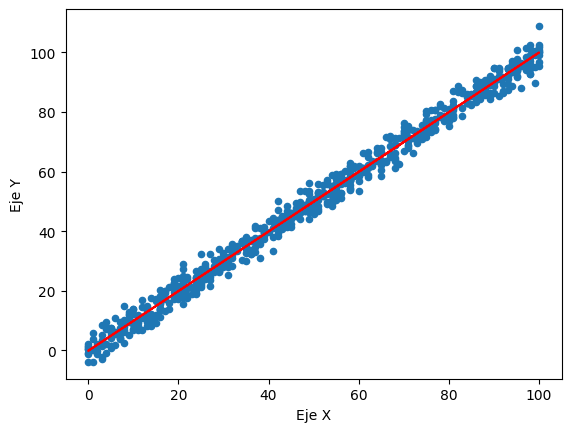

In [182]:
b = reg.intercept_
w = reg.coef_

x = x_test
y = b + w*x

train_df.plot.scatter(x='x', y='y')
plt.plot(x, y, '-r')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

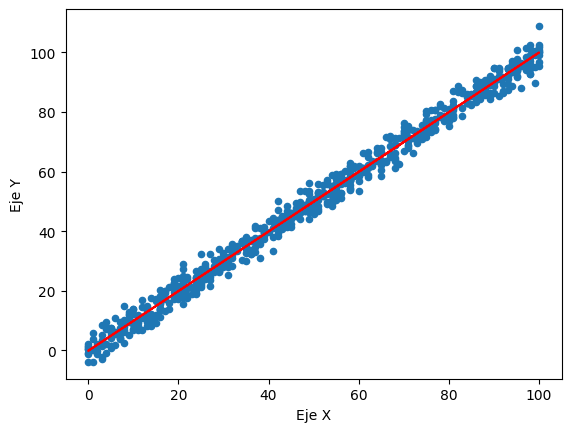

In [183]:
x = x_test
y = pred

train_df.plot.scatter(x='x', y='y')
plt.plot(x, y, '-r')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

# Usando XGBoost

In [184]:
import xgboost

## Objetive linear y métrica de evaluación RMSE

In [185]:
model = xgboost.XGBRegressor(objective='reg:linear',
                             eval_metric='rmse',
                             n_estimators=15,
                             seed=1)

In [186]:
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:11:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [187]:
y_test_pred = model.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, pred))
mae_test = MAE(y_test, pred)

In [188]:
y_train_pred = model.predict(x_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

In [189]:
resultado = {
    'Modelo': 'regresión lineal xgboost rmse 15 árboles',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head()

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal simple,0.990702,0.988801,2.804951,3.071306,2.227152,2.415772
1,regresión lineal xgboost rmse 15 árboles,0.990440,0.988362,2.844078,3.071306,2.259770,2.415772


## Objetive error cuadrático y métrica de evaluación RMSE

In [190]:
model = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=30,
                             seed=1)

In [191]:
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [192]:
y_test_pred = model.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, pred))
mae_test = MAE(y_test, pred)

In [193]:
y_train_pred = model.predict(x_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

In [194]:
resultado = {
    'Modelo': 'regresión lineal xgboost rmse 30 árboles',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head()

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal simple,0.990702,0.988801,2.804951,3.071306,2.227152,2.415772
1,regresión lineal xgboost rmse 15 árboles,0.990440,0.988362,2.844078,3.071306,2.259770,2.415772
2,regresión lineal xgboost rmse 30 árboles,0.990632,0.988766,2.815487,3.071306,2.232545,2.415772


## Objetive linear y métrica de evaluación AUC (área bajo la curva)

In [195]:
model = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='auc',
                             n_estimators=30,
                             seed=1)

In [196]:
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='auc', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [197]:
y_test_pred = model.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, pred))
mae_test = MAE(y_test, pred)

In [198]:
y_train_pred = model.predict(x_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

In [199]:
resultado = {
    'Modelo': 'regresión lineal xgboost auc 30 árboles',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal simple,0.990702,0.988801,2.804951,3.071306,2.227152,2.415772
1,regresión lineal xgboost rmse 15 árboles,0.990440,0.988362,2.844078,3.071306,2.259770,2.415772
2,regresión lineal xgboost rmse 30 árboles,0.990632,0.988766,2.815487,3.071306,2.232545,2.415772
3,regresión lineal xgboost auc 30 árboles,0.990632,0.988766,2.815487,3.071306,2.232545,2.415772


# Regresión lineal múltiple

Separar los dataframe en variables predictoras


\begin{equation}
y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + b_3 \cdot x_3 + ... + \varepsilon
\end{equation}

Donde:

\begin{align*}
y & : \text{Variable dependiente} \\
x_1 , x_2 , x_3 & : \text{Variable independiente} \\
b_0 & : \text{Ordenada al origen (intercepto)} \\
b_1 , b_2, b_3 & : \text{Pendiente de la línea de regresión} \\
\varepsilon & : \text{Término de error}
\end{align*}


In [200]:
!curl --output insurance.csv https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54288  100 54288    0     0   219k      0 --:--:-- --:--:-- --:--:--  220k


In [201]:
dataset = '/content/insurance.csv'

In [202]:
df = pd.read_csv(dataset)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Validar que no existan valores vacíos.

In [204]:
print(df.isnull().values.any())

False


Mostrar estadísticos del dataset.

In [205]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [206]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Validar si no existen registros duplicados.

In [207]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Eliminamos registros duplicados.

In [208]:
df.drop_duplicates(inplace=True)

Defino las variables para mi modelo de regresión lineal múltiple.

- Variables independientes:

  `age`,	`sex`,	`bmi`,	`children`,	`smoker`,	`region`

  1- `age`: Edad del beneficiario principal.

  2- `sex`: Género del contratista del seguro, con valores “femenino” o “masculino”.

  3- `bmi`: Índice de masa corporal, un indicador numérico del peso corporal en relación con la altura. Se calcula dividiendo el peso en kilogramos por el cuadrado de la altura en metros. Idealmente, un IMC entre 18,5 y 24,9 se considera normal.

  4- `children`: El número de hijos cubiertos por el seguro médico o el número de dependientes.

  5- `smoker`: Situación fumadora del individuo, indicado como fumador o no fumador.

  6- `region`: Zona residencial del beneficiario en Estados Unidos, con opciones que incluyen noreste, sureste, suroeste y noroeste.


- Variable dependiente:

  `charges`

  1- `charges`: Costos médicos individuales facturados por el seguro médico.

In [209]:
target = df["charges"]

In [210]:
df.drop("charges", axis=1, inplace=True)

Variables categóricas

In [211]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [212]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [213]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Normalizar los valores de las variables categóricas

In [214]:
# @title
df = pd.get_dummies(df,
                    columns=['sex', 'smoker'],
                    drop_first=True,
                    dtype="int")
df = pd.get_dummies(df,
                    columns=['region'],
                    drop_first=False,
                    dtype="int")

In [215]:
df.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0


In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X = df
Y = target

In [218]:
X.shape

(1337, 9)

In [219]:
Y.shape

(1337,)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=X['sex_male'])

In [221]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Valores de los coeficientes para cada una de las variables predictoras.

In [222]:
reg.coef_

array([  242.93181092,   361.00298135,   560.48398273,  -180.24068961,
       24046.7586685 ,   497.22544662,   339.84642558,  -400.76915649,
        -436.3027157 ])

In [223]:
reg.intercept_

-12860.399944291077

Formula de la Regresión Lineal Multiple

In [226]:

coefficients = reg.coef_
intercept = reg.intercept_
variables = X.columns


formula = "y = {:.2f}".format(intercept)


for variable, coefficient in zip(variables, coefficients):
    if coefficient < 0:
        formula += " - {:.2f}*{}".format(abs(coefficient), variable)
    else:
        formula += " + {:.2f}*{}".format(coefficient, variable)

print(formula)


y = -12860.40 + 242.93*age + 361.00*bmi + 560.48*children - 180.24*sex_male + 24046.76*smoker_yes + 497.23*region_northeast + 339.85*region_northwest - 400.77*region_southeast - 436.30*region_southwest


In [227]:
y_test_pred = reg.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

In [228]:
y_train_pred = reg.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

In [229]:
resultados_df = pd.DataFrame()

In [230]:
resultado = {
    'Modelo': 'regresión lineal multiple',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal multiple,0.764867,0.714085,5914.560676,6356.573921,4108.933086,4340.343569


Si el accuracy de test es mayor que el de entrenamiento significa que hay que revisar el modelo. Algo está fallando en la predicción.

In [231]:
model = xgboost.XGBRegressor(objective='reg:linear',
                             eval_metric='rmse',
                             n_estimators=12,
                             seed=1)

In [232]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:17:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Score de los datos de entrenamiento.

In [233]:
y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

Score de los datos de test.

In [234]:
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

In [235]:
resultado = {
    'Modelo': 'regresión lineal multiple XGBoost',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal multiple,0.764867,0.714085,5914.560676,6356.573921,4108.933086,4340.343569
1,regresión lineal multiple XGBoost,0.944185,0.813203,2881.658984,5137.949306,1534.785681,2807.405452


## Overfitting del modelo

In [236]:
model = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=12,
                             seed=1)

In [237]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Graficar el árbol de decisión del modelo

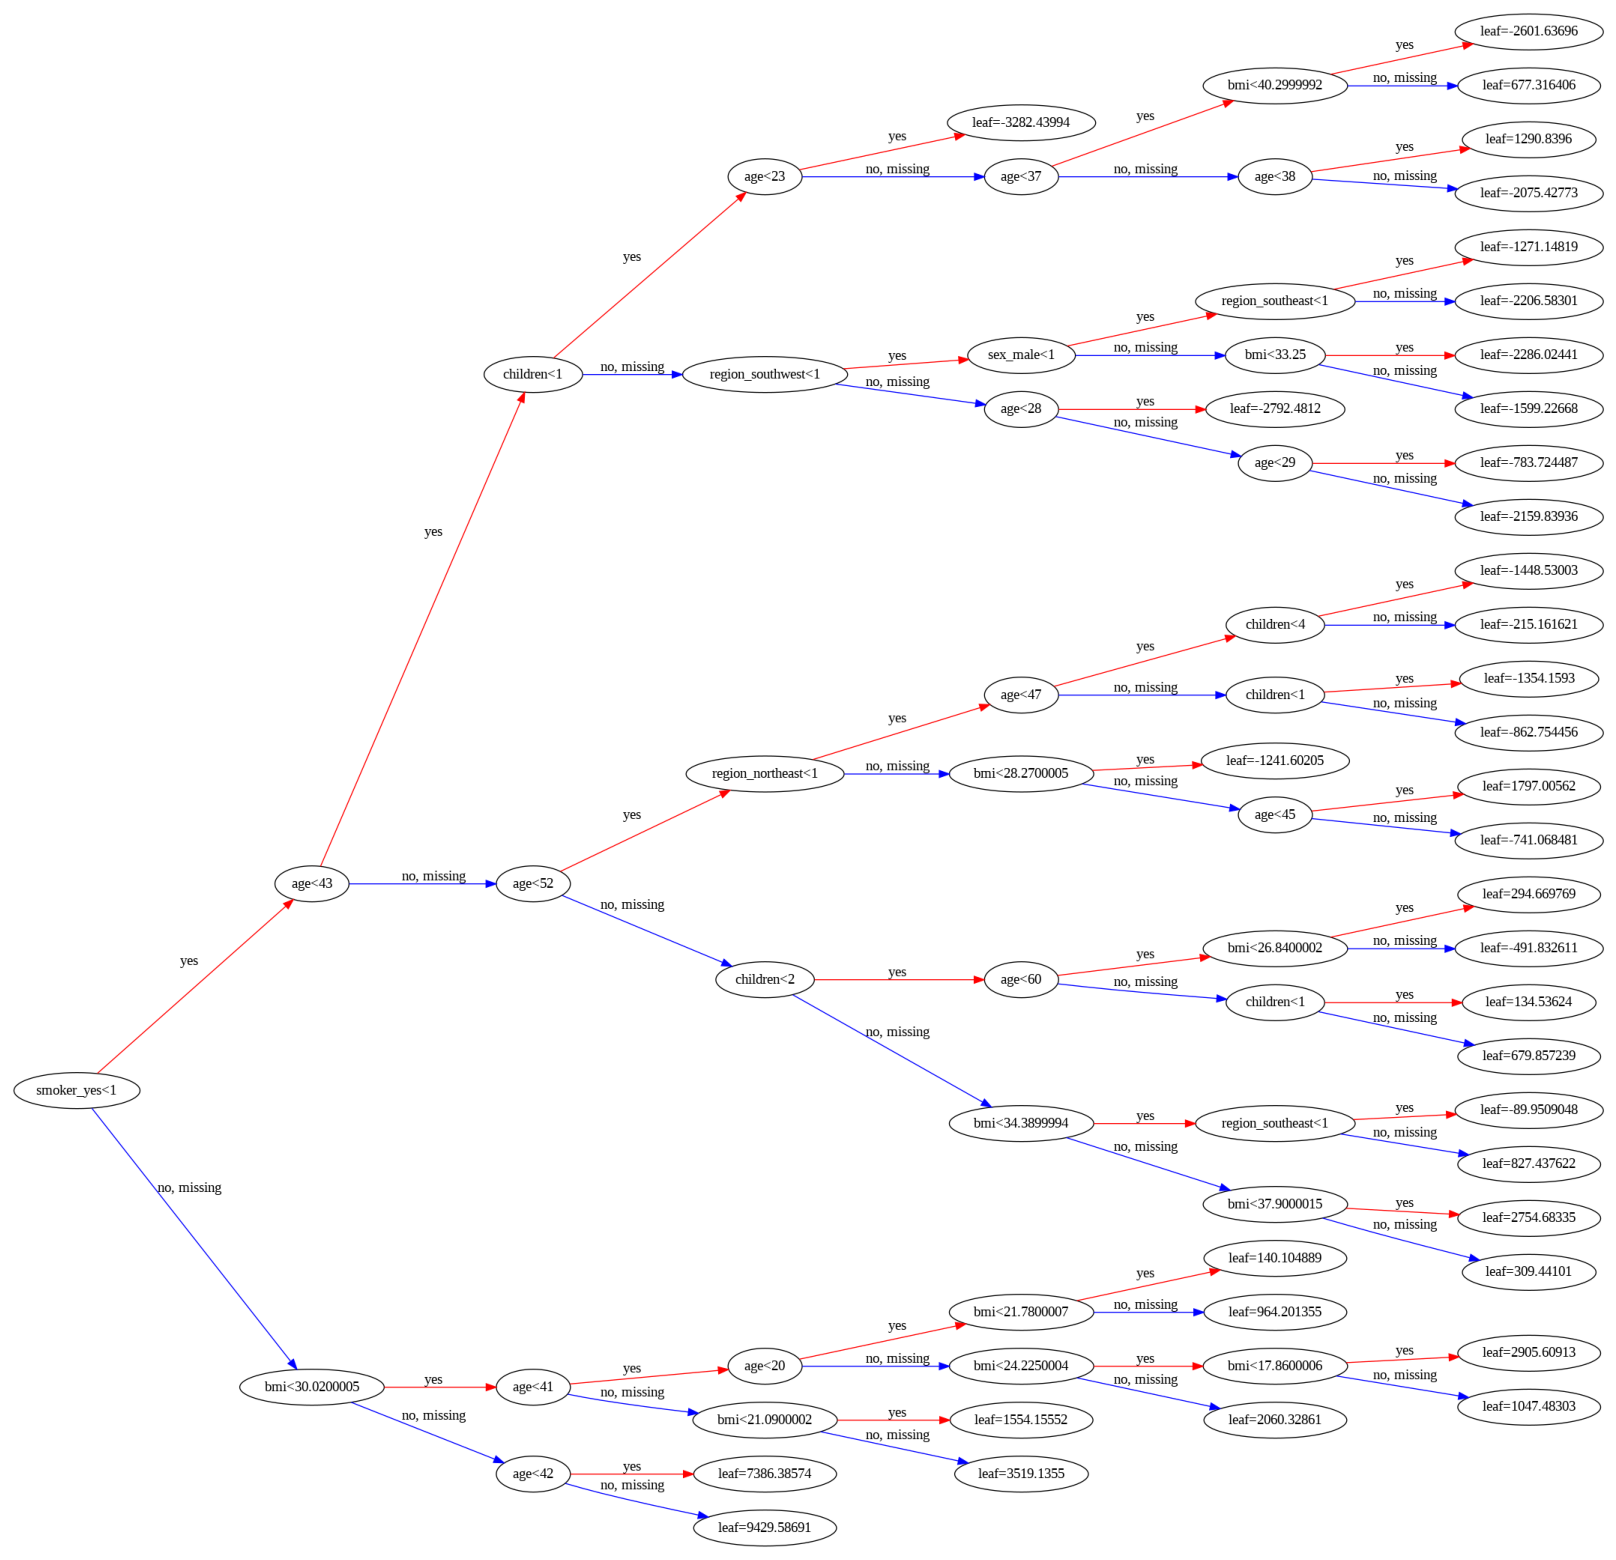

In [238]:
fig, ax = plt.subplots(figsize=(80, 20))
xgboost.plot_tree(model, num_trees=0, ax=ax, rankdir='LR')  # num_trees indica el número del árbol # LR indica la dirección del árbol Left-to-Right
plt.show()

Score de los datos de entrenamiento.

In [239]:
y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

Score de los datos de test.

In [240]:
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

In [241]:
resultado = {
    'Modelo': 'regresión lineal multiple XGBoost squarerror',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal multiple,0.764867,0.714085,5914.560676,6356.573921,4108.933086,4340.343569
1,regresión lineal multiple XGBoost,0.944185,0.813203,2881.658984,5137.949306,1534.785681,2807.405452
2,regresión lineal multiple XGBoost squarerror,0.944185,0.813203,2881.658984,5137.949306,1534.785681,2807.405452


In [242]:
model = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=20, #cantidad de arboles
                             seed=1)

# Ajustando el modelo
model.fit(X_train, y_train)

# Entrenamiento
y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

# Test
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

# Comparar resultados
resultado = {
    'Modelo': 'regresión lineal multiple XGBoost squarerror 20 árboles',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,regresión lineal multiple,0.764867,0.714085,5914.560676,6356.573921,4108.933086,4340.343569
1,regresión lineal multiple XGBoost,0.944185,0.813203,2881.658984,5137.949306,1534.785681,2807.405452
2,regresión lineal multiple XGBoost squarerror,0.944185,0.813203,2881.658984,5137.949306,1534.785681,2807.405452
3,regresión lineal multiple XGBoost squarerror 2...,0.962756,0.803151,2353.946409,5274.383557,1262.857552,2908.962670


A partir del cuadro, se visualiza que el coeficiente de determinación del conjunto de entrenamiento a aumentado. Sin embargo, el coeficiente de determinación del conjunto de test ha disminuido, al igual que el RMSE (error de raíz cuadrada media) .

Esto significa que al aumentar los árboles hay un overfitting y no puede predecir correctamente nuevos valores.

# Uso de SHAP

In [243]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.3 MB/s eta 0:00:00


In [244]:
import shap

[04:24:09] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


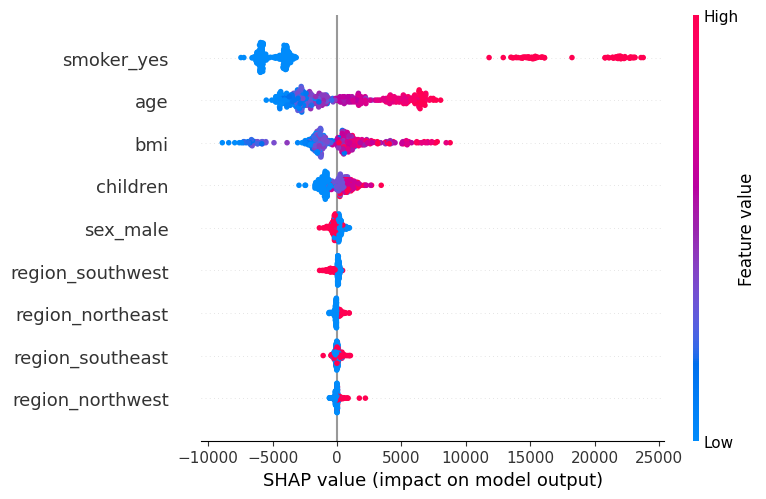

In [247]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Eje vertical:**

La posición vertical de un punto indica la contribución de esa observación al resultado del modelo.

**Eje horizontal:**

Puntos hacia la derecha contribuyen positivamente, mientras que puntos hacia la izquierda contribuyen negativamente.

[04:24:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


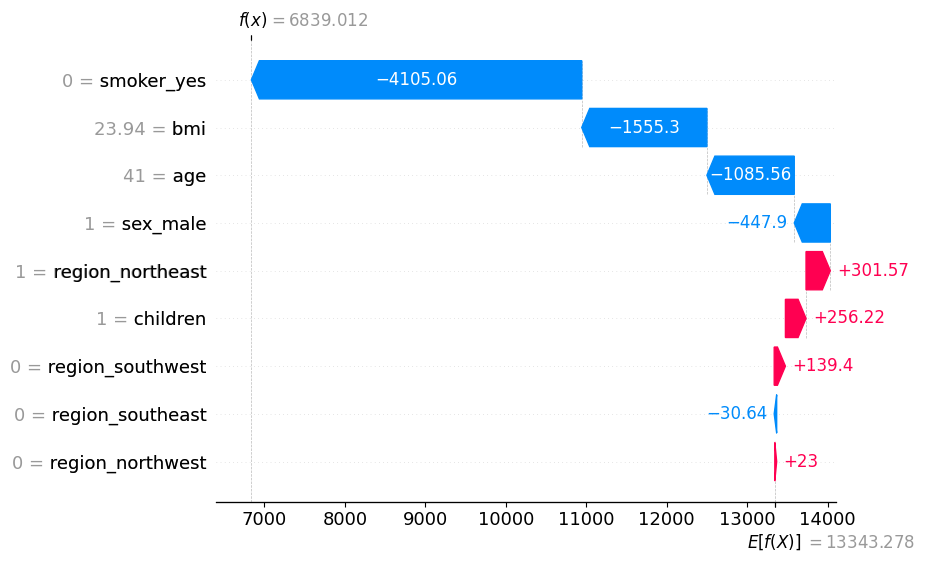

In [248]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Visualizar cómo afectan las variables al resultado del primer caso
shap.plots.waterfall(shap_values[0])

[04:26:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


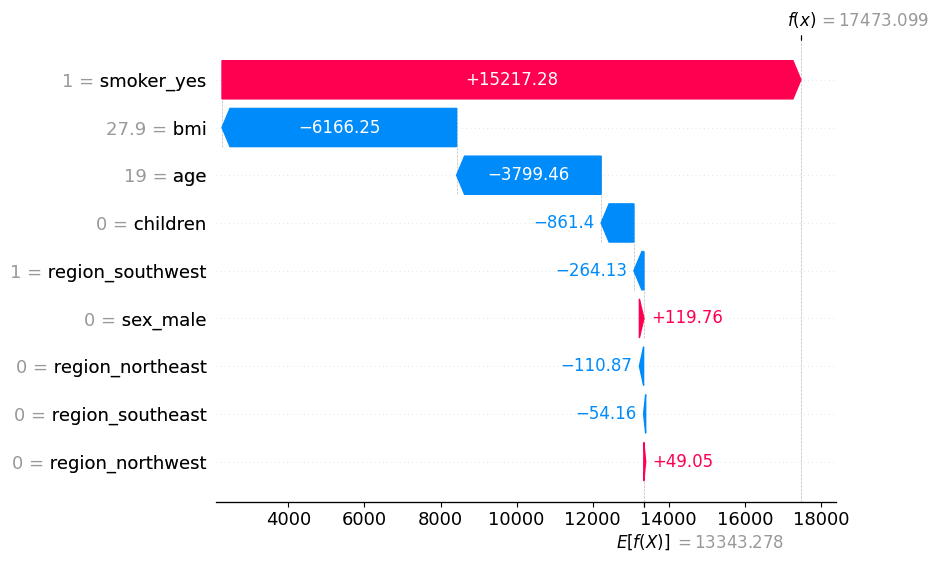

In [250]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualizar cómo afectan las variables al resultado del primer caso
shap.plots.waterfall(shap_values[0])

In [251]:
# Crear subgráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=['Gráfico de dispersión de datos Es fumador',
                                                    'Gráfico de dispersión de datos Edad'])

# Subgráfico 1
trace_train = go.Scatter(x=X['smoker_yes'], y=Y, mode='markers')
fig.add_trace(trace_train, row=1, col=1)
fig.update_xaxes(title_text='Fumador Si:1 No:0', row=1, col=1)
fig.update_yaxes(title_text='Costo', row=1, col=1)

# Subgráfico 2
trace_test = go.Scatter(x=X['age'], y=Y, mode='markers')
fig.add_trace(trace_test, row=1, col=2)
fig.update_xaxes(title_text='Edad', row=1, col=2)
fig.update_yaxes(title_text='Costo', row=1, col=2)

# Actualizar diseño
fig.update_layout(title='Scatter Plots',
                  showlegend=False)

# Mostrar el gráfico
fig.show()

In [252]:
# Crear el gráfico 3D interactivo con Plotly
fig = go.Figure()

# Scatter plot de los datos
fig.add_trace(go.Scatter3d(x=X['smoker_yes'], y=X['age'], z=Y,
                           mode='markers', marker=dict(size=5), name='Datos de entrenamiento'))

# Configuración de diseño
fig.update_layout(scene=dict(xaxis_title='smoker_yes', yaxis_title='age', zaxis_title='target'),
                  title='Relación entre variables en 3D')

# Mostrar el gráfico interactivo
fig.show()

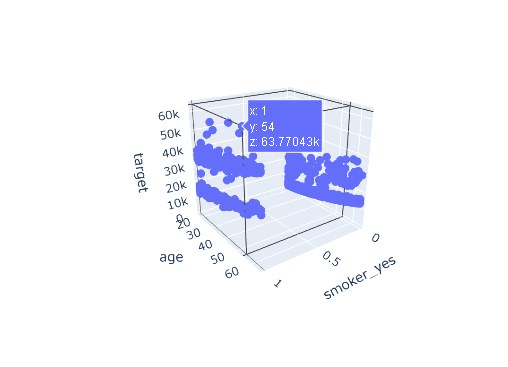

In [255]:
X = X[['smoker_yes', 'age']]
y = Y

# Crear y entrenar el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=12, booster='gblinear',
                             seed=1)
modelo_regresion_lineal.fit(X, y)

# Obtener los coeficientes de la recta
coeficientes = modelo_regresion_lineal.coef_
intercepto = modelo_regresion_lineal.intercept_

# Crear una malla para el plano de regresión
x1_range = np.linspace(X['smoker_yes'].min(), X['smoker_yes'].max(), 100)
x2_range = np.linspace(X['age'].min(), X['age'].max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = coeficientes[0] * x1_mesh + coeficientes[1] * x2_mesh + intercepto

# Crear el gráfico 3D interactivo con Plotly
fig = go.Figure()

# Scatter plot de los datos
fig.add_trace(go.Scatter3d(x=X['smoker_yes'], y=X['age'], z=y,
                           mode='markers', marker=dict(size=5), name='Datos de entrenamiento'))

# Superficie de la predicción del modelo de regresión lineal
fig.add_trace(go.Surface(z=y_pred_mesh, x=x1_mesh, y=x2_mesh, opacity=0.7, colorscale='Viridis', name='Predicción Regresión Lineal'))

# Configuración de diseño
fig.update_layout(scene=dict(xaxis_title='Si es fumador', yaxis_title='Edad', zaxis_title='Gastos'),
                  title='Gráfico 3D con Regresión Lineal')

# Mostrar el gráfico interactivo
fig.show()

Se hace una reducción de dimensionalidad